In [81]:
### import libraries ###
#from astropy.io import fits
#from astropy import table
import os
import pandas as pd
import func_stat
from func_dataset_preprocessing import residCol
import matplotlib.pyplot as plt

In [74]:
### Directories and file names ###
dirCatalogs=r'/mnt/Data/Work/Sources/COSMOS'
fileTest='/CatalogsFromWorkingPC/ex018/datasets/05_COSMOS_SpectrZ_Zlim_1p2_Test_SOMinfo.csv'
filePau='/Additional Catalogs/PAU.csv'
fileDeimos='/CatalogsFromWorkingPC/ex018/datasets/04_COSMOS_DEIMOS_QfFilter_SOMinfo.csv'

In [75]:
test=pd.read_csv(dirCatalogs+fileTest)
pau=pd.read_csv(dirCatalogs+filePau)
deimos=pd.read_csv(dirCatalogs+fileDeimos)

In [19]:
pau.columns

Index(['ref_id', 'i_auto', 'photoz', 'ra', 'dec', 'nbands', 'id_laigle',
       'zspec_mean', 'zspec_std', 'best_model', 'best_extlaw',
       'best_continuum', 'best_ebv', 'best_type'],
      dtype='object')

In [76]:
deimos.columns

Index(['Seq', 'photoZ_ML', 'RAJ2000', 'DEJ2000', 'Ksmagap3', 'Ymagap3',
       'Hmagap3', 'Jmagap3', 'Bmagap3', 'Vmagap3', 'ipmagap3', 'rmagap3',
       'umagap3', 'zppmagap3', 'IB574ap3', 'photoZ_SED', 'specZ', 'Qf', 'Q',
       'sc_Ksmagap3', 'sc_Ymagap3', 'sc_Hmagap3', 'sc_Jmagap3', 'sc_Bmagap3',
       'sc_Vmagap3', 'sc_ipmagap3', 'sc_rmagap3', 'sc_umagap3', 'sc_zppmagap3',
       'resid_ML', 'resid_SED', 'residML_SED', 'w_sc_Ksmagap3', 'w_sc_Ymagap3',
       'w_sc_Hmagap3', 'w_sc_Jmagap3', 'w_sc_Bmagap3', 'w_sc_Vmagap3',
       'w_sc_ipmagap3', 'w_sc_rmagap3', 'w_sc_umagap3', 'w_sc_zppmagap3',
       'quantErr', 'cellID_TrainSOM', 'cellID_RunSOM', 'cellID_RunBigSOM',
       'specZ_outlCoeff', 'photoZ_ML_outlCoeff', 'photoZ_SED_outlCoeff',
       'quantErr_outlCoeff', 'trainMapOccupation'],
      dtype='object')

In [77]:
testPau=test.merge(pau,how='left',left_on='Seq',right_on='id_laigle')
deimosPau=deimos.merge(pau,how='left',left_on='Seq',right_on='id_laigle')

In [78]:
testPau=testPau.rename(columns={'photoz':'photoZ_PAU'})
deimosPau=deimosPau.rename(columns={'photoz':'photoZ_PAU'})

In [27]:
testPau.columns

Index(['RAJ2000', 'DEJ2000', 'Seq', 'Ksmagap3', 'Ymagap3', 'Hmagap3',
       'Jmagap3', 'Bmagap3', 'Vmagap3', 'ipmagap3', 'rmagap3', 'umagap3',
       'zppmagap3', 'IB574ap3', 'photoZ_SED', 'specZ', 'Instr', 'Q_f',
       'sc_Ksmagap3', 'sc_Ymagap3', 'sc_Hmagap3', 'sc_Jmagap3', 'sc_Bmagap3',
       'sc_Vmagap3', 'sc_ipmagap3', 'sc_rmagap3', 'sc_umagap3', 'sc_zppmagap3',
       'photoZ_ML', 'resid_ML', 'resid_SED', 'residML_SED', 'w_sc_Ksmagap3',
       'w_sc_Ymagap3', 'w_sc_Hmagap3', 'w_sc_Jmagap3', 'w_sc_Bmagap3',
       'w_sc_Vmagap3', 'w_sc_ipmagap3', 'w_sc_rmagap3', 'w_sc_umagap3',
       'w_sc_zppmagap3', 'quantErr', 'cellID_TrainSOM', 'cellID_RunSOM',
       'cellID_RunBigSOM', 'specZ_outlCoeff', 'photoZ_ML_outlCoeff',
       'photoZ_SED_outlCoeff', 'quantErr_outlCoeff', 'trainMapOccupation',
       'ref_id', 'i_auto', 'photoZ_PAU', 'ra', 'dec', 'nbands', 'id_laigle',
       'zspec_mean', 'zspec_std', 'best_model', 'best_extlaw',
       'best_continuum', 'best_ebv', 'best_type'],

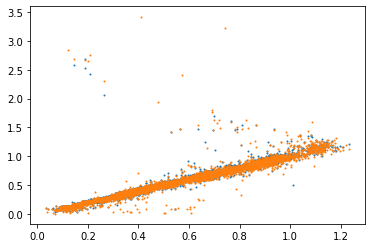

In [33]:
t=testPau[testPau['specZ']<1.2]
plt.scatter(t['photoZ_ML'],t['photoZ_PAU'],s=1)
plt.scatter(t['photoZ_ML'],t['photoZ_SED'],s=1)

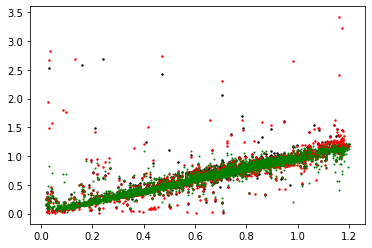

In [37]:
t=testPau[testPau['specZ']<1.2]
plt.scatter(t['specZ'],t['photoZ_PAU'],s=2,c='black')
plt.scatter(t['specZ'],t['photoZ_SED'],s=2,c='red')
plt.scatter(t['specZ'],t['photoZ_ML'],s=1,c='green')

In [79]:
testPau=testPau[~testPau['photoZ_PAU'].isna()]
testPau=residCol(testPau,'specZ','photoZ_PAU','resid_PAU')
deimosPau=deimosPau[~deimosPau['photoZ_PAU'].isna()]
deimosPau=residCol(deimosPau,'specZ','photoZ_PAU','resid_PAU')

In [100]:
statTabDeimos=func_stat.createStatTab(cases=['resid_ML','resid_SED','resid_PAU'])

In [101]:
t=deimosPau
residCols=['resid_ML','resid_SED','resid_PAU']
statTabDeimos=func_stat.allStatsAddRec(statTabDeimos,'noClean',t,residCols)
t=t[t['trainMapOccupation']>5]
statTabDeimos=func_stat.allStatsAddRec(statTabDeimos,'occupationMap',t,residCols)
t=t[t['specZ_outlCoeff']<3]
statTabDeimos=func_stat.allStatsAddRec(statTabDeimos,'occupation + specZ_OultCoeff',t,residCols)
t=t[t['specZ_outlCoeff']<=1]
statTabDeimos=func_stat.allStatsAddRec(statTabDeimos,'occupation + specZ_OultCoeff<=1',t,residCols)

In [102]:
statTabTest=func_stat.createStatTab(cases=['resid_ML','resid_SED','resid_PAU'])
t=testPau
residCols=['resid_ML','resid_SED','resid_PAU']
statTabTest=func_stat.allStatsAddRec(statTabTest,'noClean',t,residCols)
t=t[t['trainMapOccupation']>5]
statTabTest=func_stat.allStatsAddRec(statTabTest,'occupationMap',t,residCols)
t=t[t['specZ_outlCoeff']<3]
statTabTest=func_stat.allStatsAddRec(statTabTest,'occupation + specZ_OultCoeff<3',t,residCols)
t=t[t['specZ_outlCoeff']<=1]
statTabTest=func_stat.allStatsAddRec(statTabTest,'occupation + specZ_OultCoeff<=1',t,residCols)

In [103]:
func_stat.printStat(statTabTest)

In [104]:
func_stat.printStat(statTabDeimos)

In [64]:
t=testPau
print('ML',statResid(t,'resid_ML'))
print('SED',statResid(t,'resid_SED'))
print('PAU',statResid(t,'resid_PAU'))

ML {'Num objects': 5191, 'Std': 0.04, 'NMAD': 0.018, 'Mean': -0.0016, '% outl_15': 1.33}
SED {'Num objects': 5191, 'Std': 0.069, 'NMAD': 0.01, 'Mean': -0.0018, '% outl_15': 1.58}
PAU {'Num objects': 5191, 'Std': 0.07, 'NMAD': 0.007, 'Mean': -0.0065, '% outl_15': 1.54}


In [80]:
t=deimosPau
print('ML',statResid(t,'resid_ML'))
print('SED',statResid(t,'resid_SED'))
print('PAU',statResid(t,'resid_PAU'))

ML {'Num objects': 1207, 'Std': 0.06, 'NMAD': 0.021, 'Mean': 0.0167, '% outl_15': 3.07}
SED {'Num objects': 1207, 'Std': 0.051, 'NMAD': 0.011, 'Mean': 0.0069, '% outl_15': 1.91}
PAU {'Num objects': 1207, 'Std': 0.051, 'NMAD': 0.006, 'Mean': 0.0024, '% outl_15': 1.74}


In [66]:
t=testPau
t=t[t['specZ_outlCoeff']<3]
print('ML',statResid(t,'resid_ML'))
print('SED',statResid(t,'resid_SED'))
print('PAU',statResid(t,'resid_PAU'))

ML {'Num objects': 5101, 'Std': 0.034, 'NMAD': 0.018, 'Mean': 0.0, '% outl_15': 0.82}
SED {'Num objects': 5101, 'Std': 0.049, 'NMAD': 0.01, 'Mean': 0.0008, '% outl_15': 1.06}
PAU {'Num objects': 5101, 'Std': 0.054, 'NMAD': 0.006, 'Mean': -0.0039, '% outl_15': 1.0}


In [67]:
t=testPau
t=t[t['specZ_outlCoeff']<1]
print('ML',statResid(t,'resid_ML'))
print('SED',statResid(t,'resid_SED'))
print('PAU',statResid(t,'resid_PAU'))

ML {'Num objects': 4459, 'Std': 0.028, 'NMAD': 0.017, 'Mean': 0.0037, '% outl_15': 0.47}
SED {'Num objects': 4459, 'Std': 0.03, 'NMAD': 0.01, 'Mean': 0.0042, '% outl_15': 0.72}
PAU {'Num objects': 4459, 'Std': 0.051, 'NMAD': 0.006, 'Mean': -0.0013, '% outl_15': 0.67}


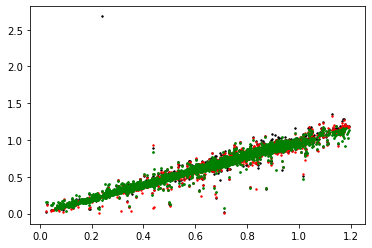

In [106]:
plt.scatter(t['specZ'],t['photoZ_PAU'],s=2,color='black')
plt.scatter(t['specZ'],t['photoZ_SED'],s=2,color='red')
plt.scatter(t['specZ'],t['photoZ_ML'],s=3,color='green')

(0.2, 0.5)

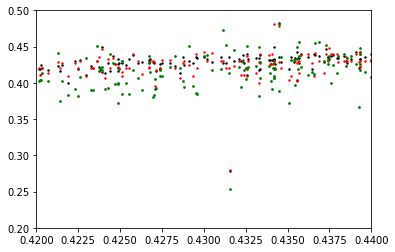

In [110]:
plt.scatter(t['specZ'],t['photoZ_PAU'],s=2,color='black')
plt.scatter(t['specZ'],t['photoZ_SED'],s=2,color='red')
plt.scatter(t['specZ'],t['photoZ_ML'],s=3,color='green')
plt.xlim(0.42,0.44)
plt.ylim(0.2,0.5)